In [1]:
%matplotlib inline

In [2]:
import numpy as np
import iopro
import matplotlib.pyplot as plt
from custom_python_utilities.histR import histR, histRec

In [3]:
X = iopro.genfromtxt('data/event_features.csv', names=True, delimiter=',')

In [4]:
legend_names=[r'$D\tau_h$', r'$D^*\tau_h$', r'$SL$', r'$Had$', r'$Cont$']

typeset_name = { 
    'ny' : r'$n\Upsilon$',
    'ntracks' : r'$N_{track}$',
    'r2' : r'$R_2$',
    'r2all' : r'$R_2$ All',
    'cand_score' : r'Candidate Score',
    'signal_score' : r'signal score',
    'dstartau_score' : r'$D^{*}\tau$ score', 
    'mmiss2' : r'$M^2_{miss}$',
    'mmiss2prime' : r'Adjusted $M^2_{miss}$',
    'eextra' : r'$E_{extra}$',
    'costhetat' : r'$\cos\theta_T$',
    'tag_lp3' : r'$|\vec{p}^{tag}_\ell|$',
    'tag_cosby' : r'$\cos\theta^{tag}_{B\Upsilon}$',
    'tag_costhetadl' : r'$\cos\theta^{tag}_{D\ell}$',
    'tag_dmass' : r'$m^{tag}_{D}$',
    'tag_deltam' : r'$\Delta m^{tag}$',
    'tag_costhetadsoft' : r'$\cos\theta^{tag}_{Dsoft}$',
    'tag_softp3magcm' : r'$|\vec{p}^{tag}_{soft}|$',
    'sig_hp3' : r'$|\vec{p}^{sig}_{h}|$',
    'sig_cosby' : r'$\cos\theta^{sig}_{B\Upsilon}$',
    'sig_costhetadtau' : r'$\cos\theta^{sig}_{D\tau}$',
    'sig_vtxb' : r'$\chi^2_{sigB}$',
    'sig_dmass' : r'$m^{sig}_{D}$',
    'sig_deltam' : r'$\Delta m^{sig}$',
    'sig_costhetadsoft' : r'$\cos\theta^{sig}_{Dsoft}$',
    'sig_softp3magcm' : r'$|\vec{p}^{sig}_{soft}|$',
    'sig_hmass' : r'$m^{sig}_h$',
    'sig_vtxh' : r'$\chi^2_{sigh}$',
    'tag_dmode' : r'tag $D$ mode',
    'tag_dstarmode' : r'tag $D^*$ mode',
    'sig_dmode' : r'sig $D$ mode',
    'sig_dstarmode' : r'sig $D^*$ mode',
    'tag_l_epid' : r'tag $\ell$ electron PID',
    'tag_l_mupid' : r'tag $\ell$ muon PID',
    'sig_h_epid' : r'sig $h$ electron PID',
    'sig_h_mupid' : r'sig $h$ muon PID',    
    'tag_isbdstar' : r'Is $B_{tag}\rightarrow D^*$?',
    'sig_isbdstar' : r'Is $B_{sig}\rightarrow D^*$?',
    
}


In [5]:
def apply_cut(arr, varname, lower=None, upper=None):
    sub_arr = np.copy(arr)
    mask = np.ones(sub_arr.shape[0], dtype=bool)
    if lower is not None: mask &= (sub_arr[varname] >= lower)
    if upper is not None: mask &= (sub_arr[varname] <= upper)
    sub_arr = sub_arr[mask]
    return sub_arr

In [6]:
X['weight'] *= 25
use_log_yscale = False
stacked = True
normed = False
show_hist = True
show_spline = False

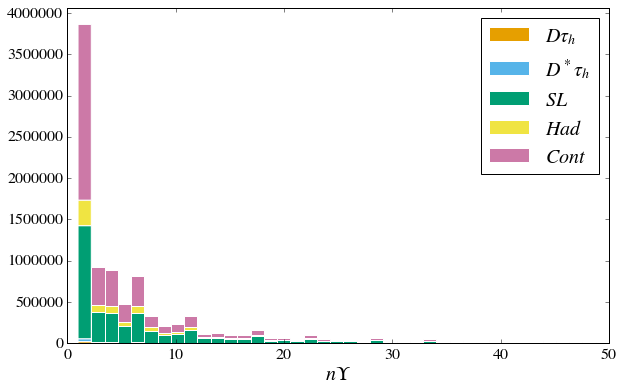

In [7]:
X_cut = apply_cut(X, 'ny', upper=50)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'ny', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=40, 
        normed=normed, 
        xlabel=typeset_name['ny'],
        legend_names=legend_names,
        legend=True)

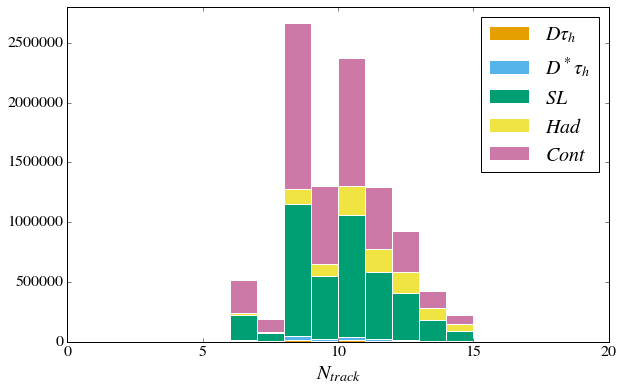

In [8]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'ntracks', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=20,
        normed=normed,
        xlabel=typeset_name['ntracks'],
        legend_names=legend_names,range=(0,20),
        legend=True)

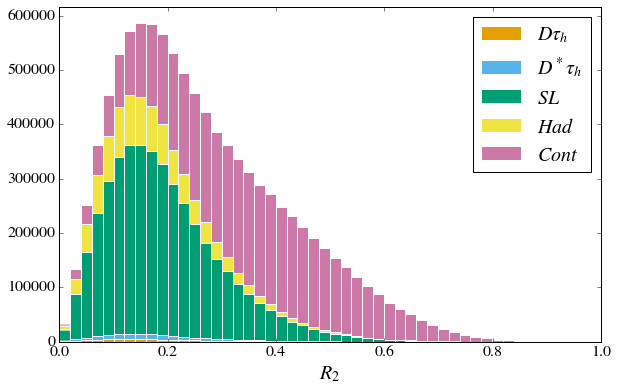

In [9]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'r2', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=15, 
        xlabel=typeset_name['r2'],
        legend_names=legend_names,
        legend=True)

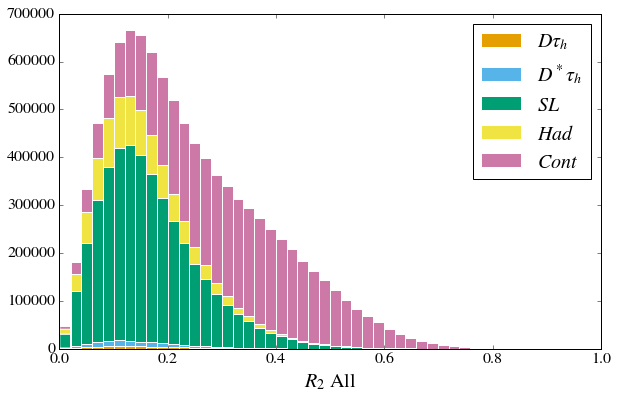

In [10]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'r2all', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=15, 
        xlabel=typeset_name['r2all'],
        legend_names=legend_names,
        legend=True)

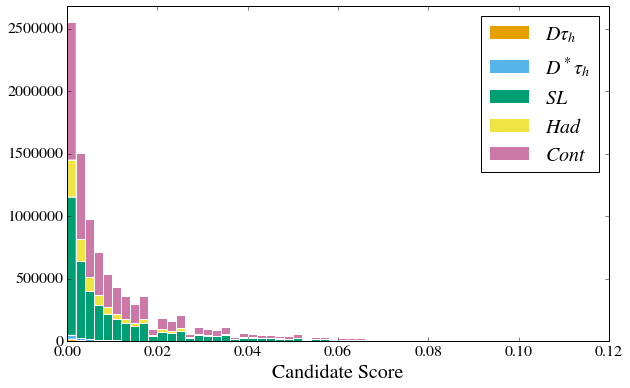

In [11]:
X_cut = apply_cut(X, 'cand_score', upper=0.1)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'cand_score', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=15, 
        xlabel=typeset_name['cand_score'],
        legend_names=legend_names,
        legend=True)

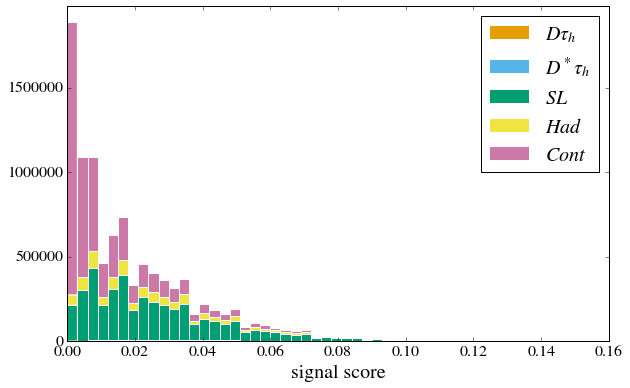

In [12]:
X_cut = apply_cut(X, 'signal_score', upper=.15)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'signal_score', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10, 
        xlabel=typeset_name['signal_score'],
        legend_names=legend_names,
        legend=True)

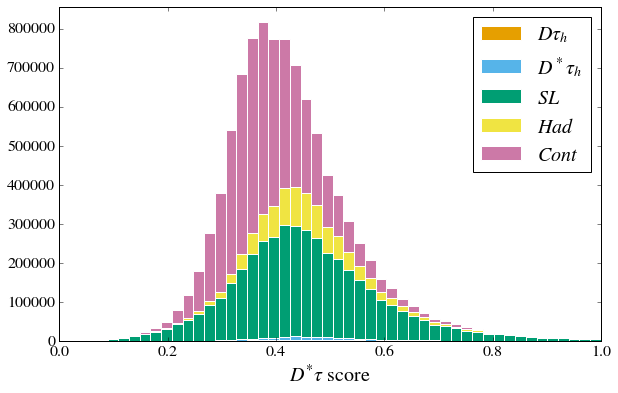

In [13]:
X_cut = apply_cut(X, 'dstartau_score')

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'dstartau_score', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=20, 
        xlabel=typeset_name['dstartau_score'],
        legend_names=legend_names,
        legend=True)

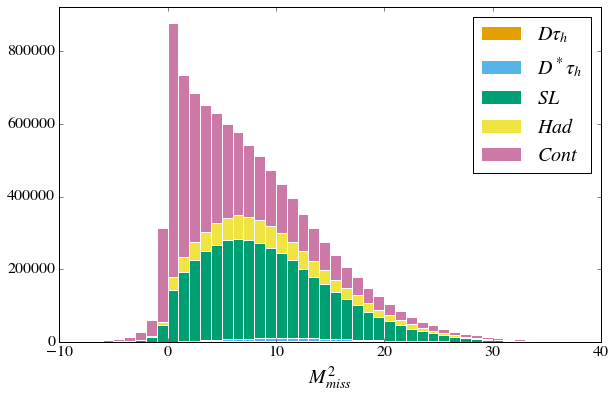

In [14]:
X_cut = apply_cut(X, 'mmiss2', lower=-10, upper=40)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'mmiss2', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=20,  
        xlabel=typeset_name['mmiss2'],
        legend_names=legend_names,
        legend=True)

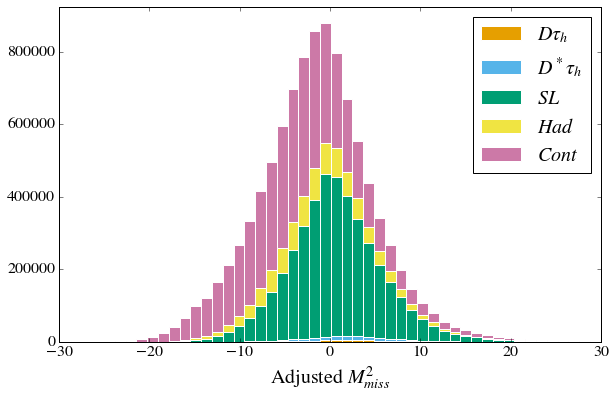

In [15]:
X_cut = apply_cut(X, 'mmiss2prime', lower=-30, upper=30)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'mmiss2prime', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=20,  
        xlabel=typeset_name['mmiss2prime'],
        legend_names=legend_names,
        legend=True)

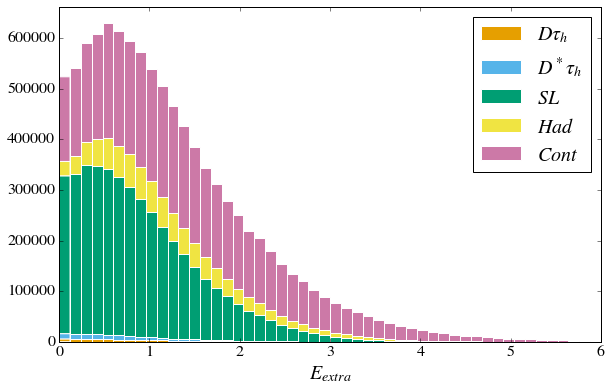

In [16]:
X_cut = apply_cut(X, 'eextra', lower=0, upper=6)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'eextra', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10,  
        xlabel=typeset_name['eextra'],
        legend_names=legend_names,
        legend=True)

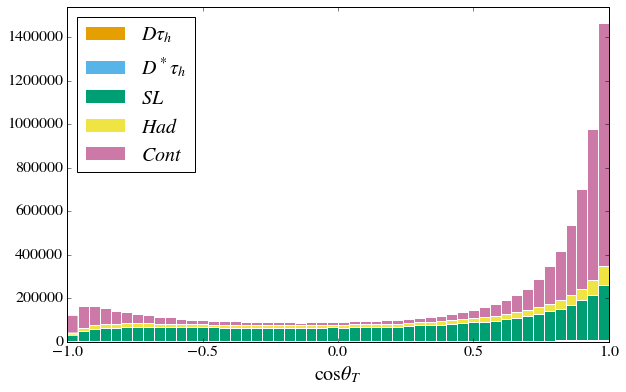

In [17]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'costhetat', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=15,  
        xlabel=typeset_name['costhetat'],
        legend_names=legend_names,
        legend=True)

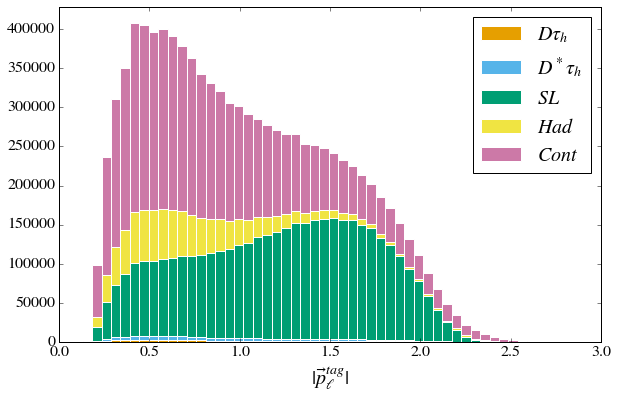

In [18]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'tag_lp3', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10,  
        xlabel=typeset_name['tag_lp3'],
        legend_names=legend_names,
        legend=True)

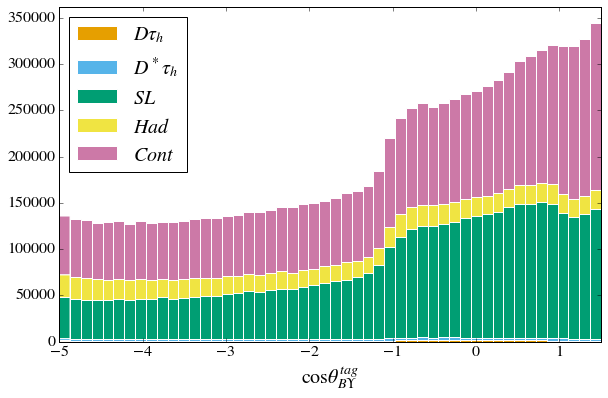

In [19]:
X_cut = apply_cut(X, 'tag_cosby', lower=-5, upper=2.0)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'tag_cosby', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10, 
        xlabel=typeset_name['tag_cosby'],
        legend_names=legend_names,
        legend=True)
ax.set_xlim(-5,1.5);

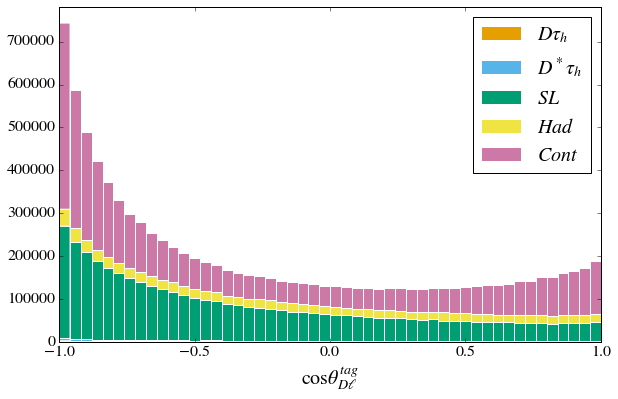

In [20]:
X_cut = apply_cut(X, 'tag_costhetadl')

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'tag_costhetadl', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10, 
        xlabel=typeset_name['tag_costhetadl'],
        legend_names=legend_names,
        legend=True)

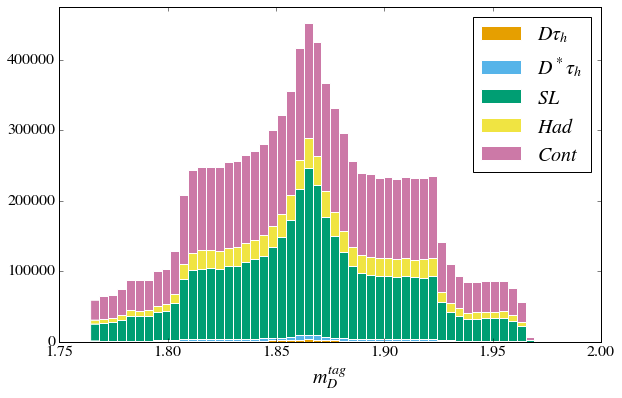

In [21]:
X_cut = apply_cut(X, 'tag_dmass', lower=1.5, upper=3.0)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'tag_dmass', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10, 
        xlabel=typeset_name['tag_dmass'],
        legend_names=legend_names,
        legend=True)

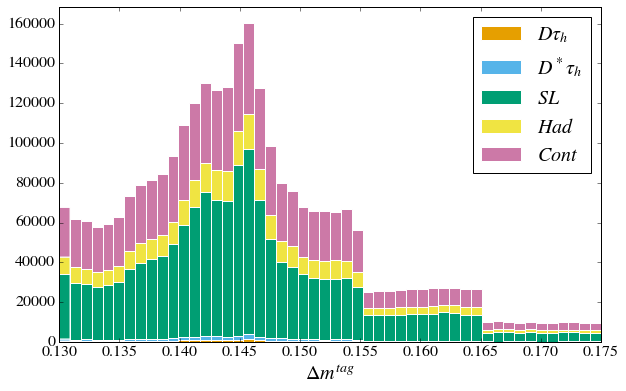

In [22]:
X_cut = apply_cut(X, 'tag_deltam', lower=0.0, upper=0.3)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'tag_deltam', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10,
        xlabel=typeset_name['tag_deltam'],
        legend_names=legend_names,
        legend=True)

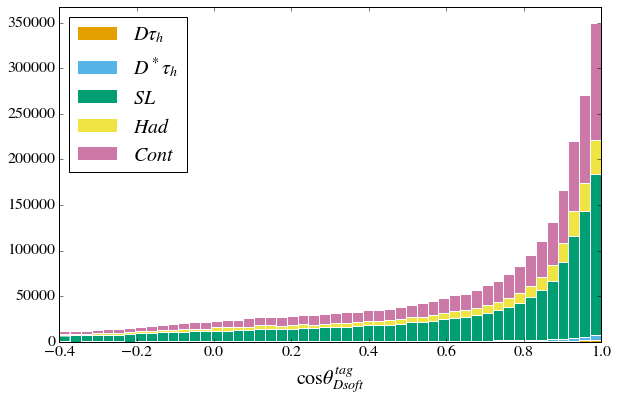

In [23]:
X_cut = apply_cut(X, 'tag_costhetadsoft', lower=-0.4, upper=1.1)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'tag_costhetadsoft', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10, 
        xlabel=typeset_name['tag_costhetadsoft'],
        legend_names=legend_names,
        legend=True)
ax.set_xlim(-0.4, 1.0);

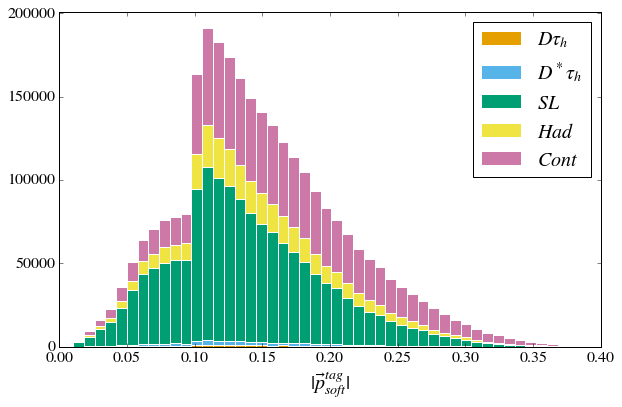

In [24]:
X_cut = apply_cut(X, 'tag_softp3magcm', lower=-0.2, upper=0.5)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'tag_softp3magcm', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10, 
        xlabel=typeset_name['tag_softp3magcm'],
        legend_names=legend_names,
        legend=True)

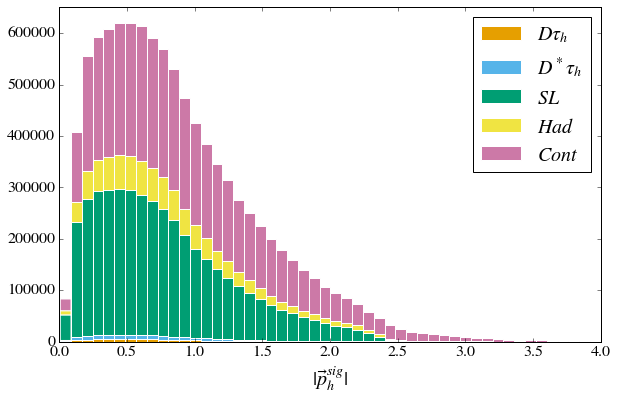

In [25]:
X_cut = apply_cut(X, 'sig_hp3', lower=0.0, upper=4.0)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'sig_hp3', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10,
        xlabel=typeset_name['sig_hp3'],
        legend_names=legend_names,
        legend=True)

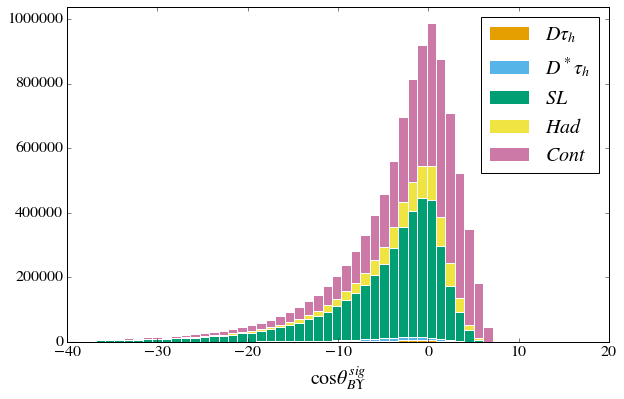

In [26]:
X_cut = apply_cut(X, 'sig_cosby', lower=-40, upper=20)
#X_cut = apply_cut(X, 'sig_cosby', lower=0, upper=20)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'sig_cosby', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10, 
        xlabel=typeset_name['sig_cosby'],
        legend_names=legend_names,
        legend=True)

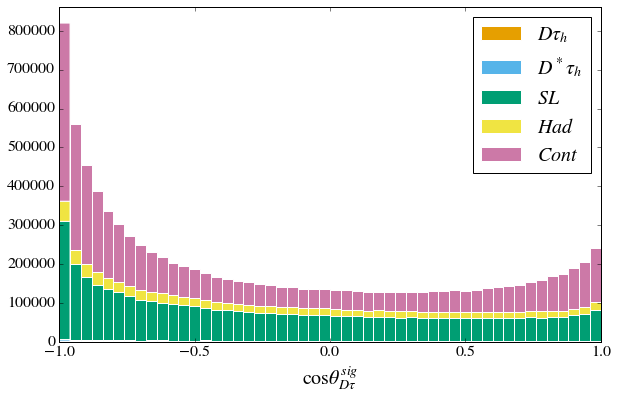

In [27]:
X_cut = apply_cut(X, 'sig_costhetadtau')

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'sig_costhetadtau', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10,
        xlabel=typeset_name['sig_costhetadtau'],
        legend_names=legend_names,
        legend=True)

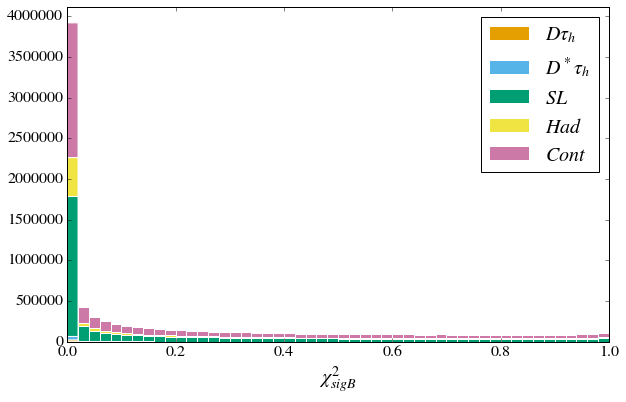

In [28]:
X_cut = apply_cut(X, 'sig_vtxb')

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'sig_vtxb', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10, 
        xlabel=typeset_name['sig_vtxb'],
        legend_names=legend_names,
        legend=True)


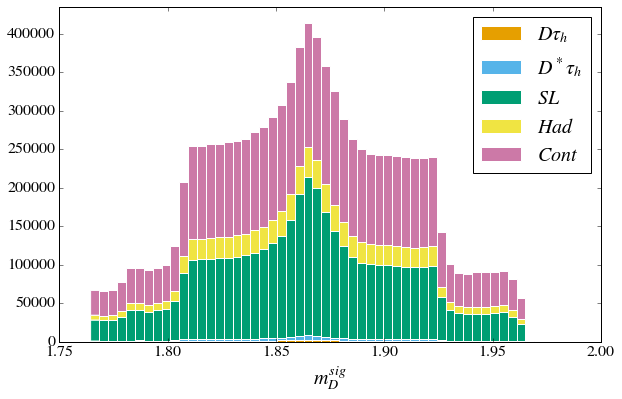

In [29]:
X_cut = apply_cut(X, 'sig_dmass', lower=1.5, upper=3.0)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'sig_dmass', weights='weight', Y='eventlabel', ax=ax, 
       stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10,
        xlabel=typeset_name['sig_dmass'],
        legend_names=legend_names,
        legend=True)

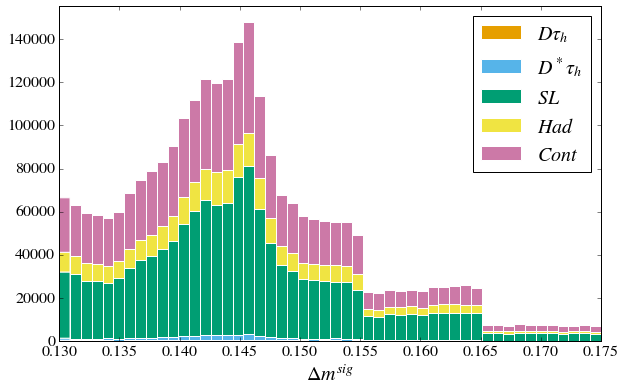

In [30]:
X_cut = apply_cut(X, 'sig_deltam', lower=0.0, upper=0.3)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'sig_deltam', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10,
        xlabel=typeset_name['sig_deltam'],
        legend_names=legend_names,
        legend=True)

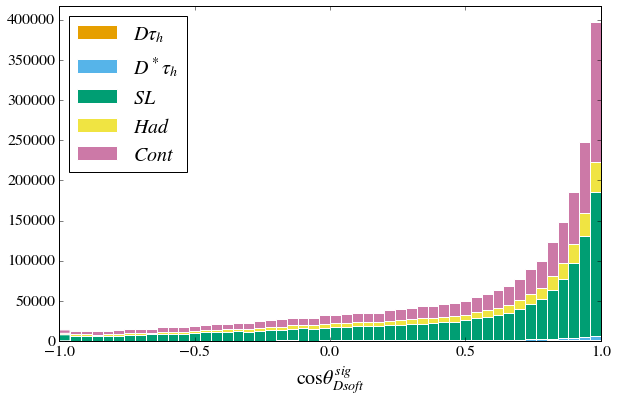

In [31]:
X_cut = apply_cut(X, 'sig_costhetadsoft', lower=-100)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'sig_costhetadsoft', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10,
        xlabel=typeset_name['sig_costhetadsoft'],
        legend_names=legend_names,
        legend=True)


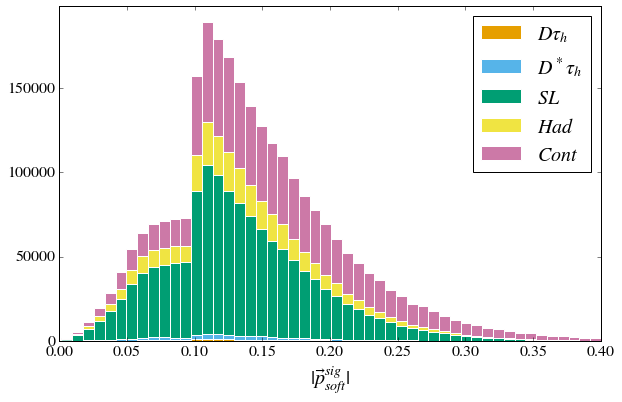

In [32]:
X_cut = apply_cut(X, 'sig_softp3magcm', lower=-0.2, upper=0.5)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'sig_softp3magcm', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10, 
        xlabel=typeset_name['sig_softp3magcm'],
        legend_names=legend_names,
        legend=True)

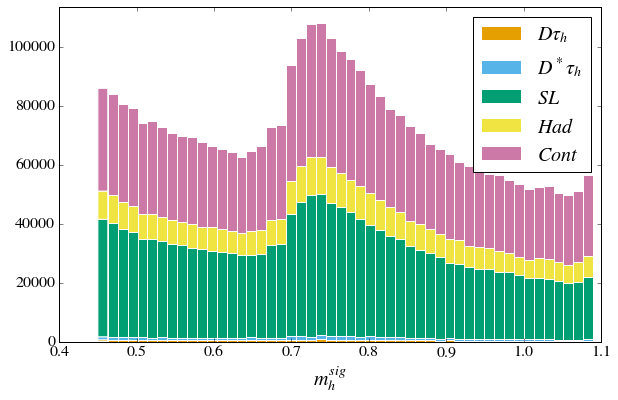

In [33]:
X_cut = apply_cut(X, 'sig_hmass', lower=0.2,upper=1.3)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'sig_hmass', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10,
        xlabel=typeset_name['sig_hmass'],
        legend_names=legend_names,
        legend=True)

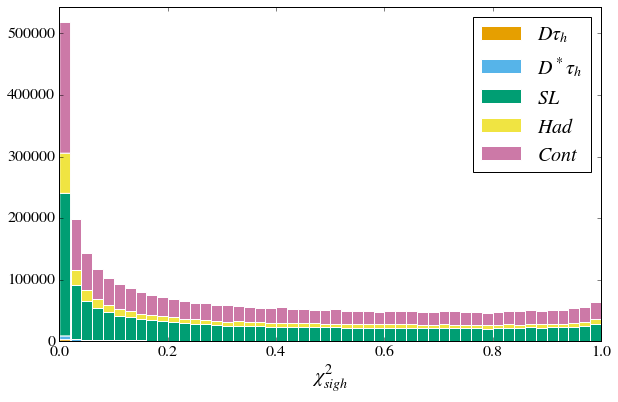

In [34]:
X_cut = apply_cut(X, 'sig_vtxh', lower=-0.5)

fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X_cut, 'sig_vtxh', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=50,
        normed=normed, show_spline=show_spline, knots_spline=10,
        xlabel=typeset_name['sig_vtxh'],
        legend_names=legend_names,
        legend=True)

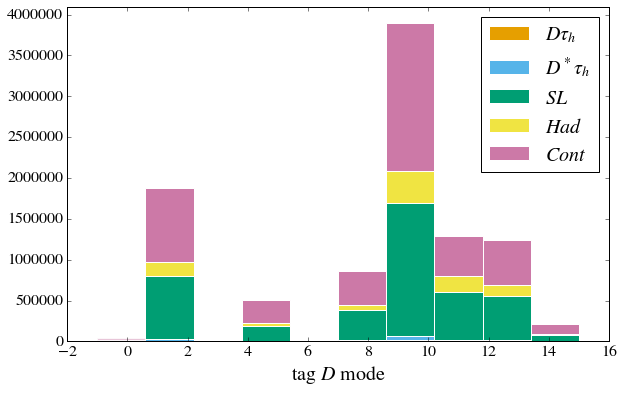

In [35]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'tag_dmode', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=10,
        normed=normed,
        xlabel=typeset_name['tag_dmode'],
        legend_names=legend_names,
        legend=True)

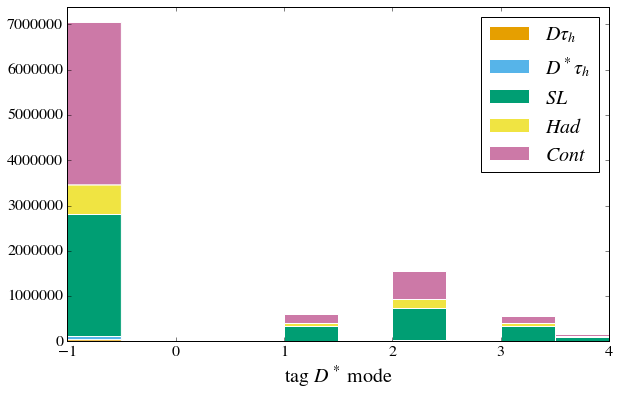

In [36]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'tag_dstarmode', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=10,
        normed=normed,
        xlabel=typeset_name['tag_dstarmode'],
        legend_names=legend_names,
        legend=True)

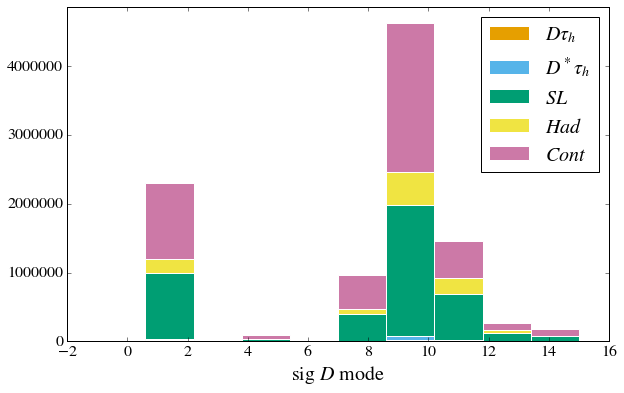

In [37]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'sig_dmode', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=10,
        normed=normed,
        xlabel=typeset_name['sig_dmode'],
        legend_names=legend_names,
        legend=True)

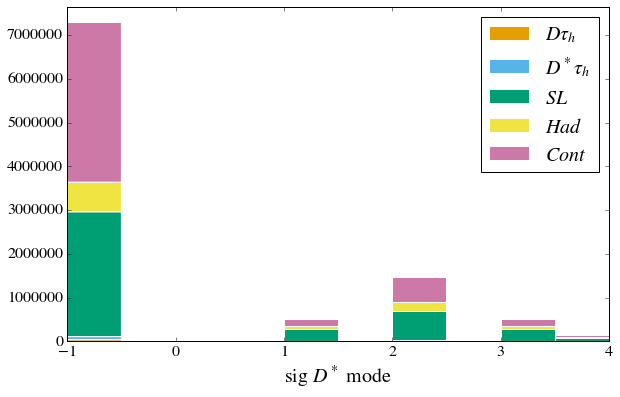

In [38]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'sig_dstarmode', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=10,
        normed=normed,
        xlabel=typeset_name['sig_dstarmode'],
        legend_names=legend_names,
        legend=True)

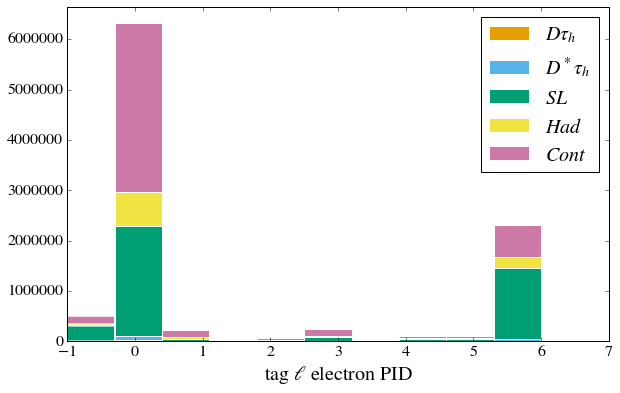

In [39]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'tag_l_epid', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=10,
        normed=normed,
        xlabel=typeset_name['tag_l_epid'],
        legend_names=legend_names,
        legend=True)

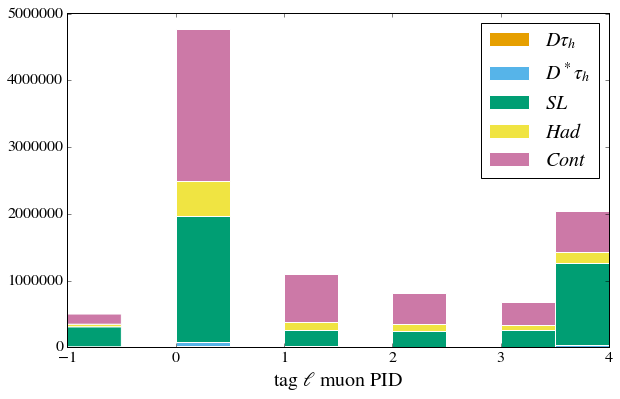

In [40]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'tag_l_mupid', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=10,
        normed=normed,
        xlabel=typeset_name['tag_l_mupid'],
        legend_names=legend_names,
        legend=True)

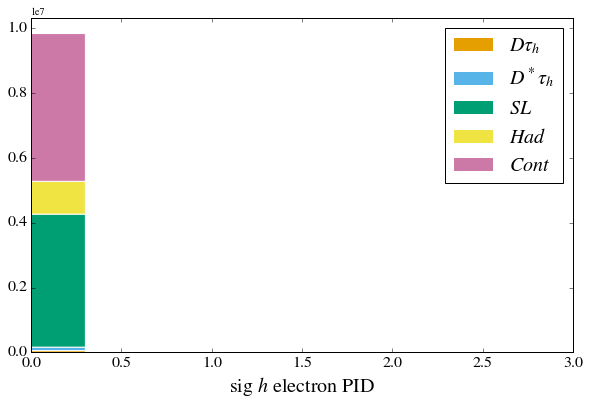

In [41]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'sig_h_epid', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=10,
        normed=normed,
        xlabel=typeset_name['sig_h_epid'],
        legend_names=legend_names,
        legend=True)

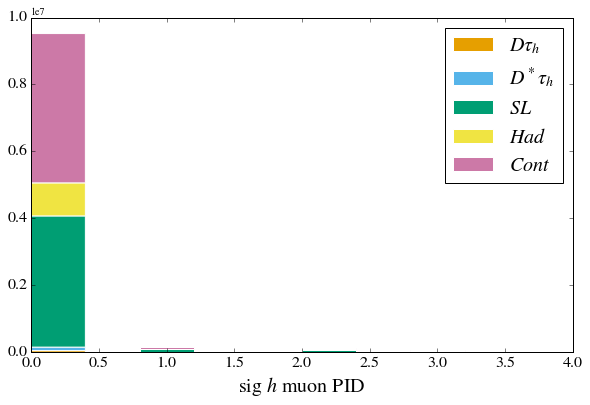

In [42]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'sig_h_mupid', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=10,
        normed=normed,
        xlabel=typeset_name['sig_h_mupid'],
        legend_names=legend_names,
        legend=True)

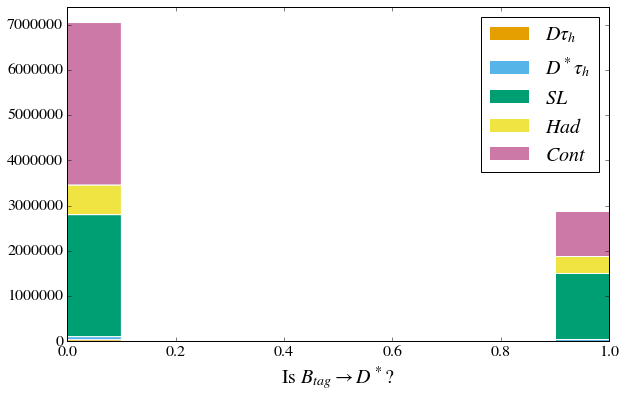

In [43]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'tag_isbdstar', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=10,
        normed=normed,
        xlabel=typeset_name['tag_isbdstar'],
        legend_names=legend_names,
        legend=True)

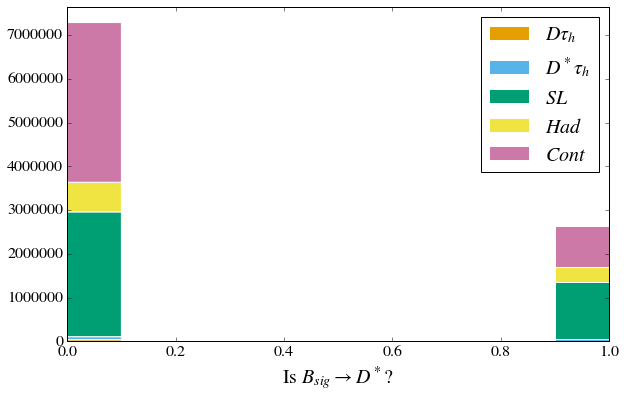

In [44]:
fig = plt.figure(figsize=(6*1.618, 6))
ax = fig.add_subplot(111)
if use_log_yscale: ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)

histRec(X, 'sig_isbdstar', weights='weight', Y='eventlabel', ax=ax, 
        stacked=stacked, show_hist=show_hist, bins=10,
        normed=normed,
        xlabel=typeset_name['sig_isbdstar'],
        legend_names=legend_names,
        legend=True)